In [10]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt

In [11]:
from pathlib import Path

mb_data = Path("../jeff_analysis/final_df.csv")
budget_analysis_df = pd.read_csv(mb_data)
budget_analysis_df.info()
budget_analysis_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   1557 non-null   object
 1   revenue                 1557 non-null   int64 
 2   budget                  1557 non-null   int64 
 3   genres                  1557 non-null   object
 4   release_date            1557 non-null   object
 5   Rotten Tomatoes Rating  1557 non-null   int64 
 6   Metascore               1557 non-null   int64 
 7   profit                  1557 non-null   int64 
 8   Director                1557 non-null   object
 9   Actors                  1557 non-null   object
 10  main_genre_movie        1557 non-null   object
 11  side_genre_movie        1557 non-null   object
 12  budget_bins             1557 non-null   object
 13  RT_bin                  1557 non-null   object
 14  Meta_bin                1557 non-null   object
dtypes: i

Index(['title', 'revenue', 'budget', 'genres', 'release_date',
       'Rotten Tomatoes Rating', 'Metascore', 'profit', 'Director', 'Actors',
       'main_genre_movie', 'side_genre_movie', 'budget_bins', 'RT_bin',
       'Meta_bin'],
      dtype='object')

In [12]:
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D


In [13]:
budget_analysis_df["genres"].value_counts()

genres
Drama                                          47
Comedy                                         37
Action, Thriller                               34
Action, Adventure, Science Fiction             33
Drama, Romance                                 32
                                               ..
Drama, Science Fiction, Adventure               1
Horror, Mystery, Comedy                         1
Horror, Comedy, Romance                         1
Thriller, Science Fiction, Mystery, Romance     1
Mystery, Action, Drama, Thriller, Crime         1
Name: count, Length: 646, dtype: int64

In [14]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 17900000, 37500000, 65500000, 111000000, 380000000]
groups = ["bin 1", "bin 2", "bin 3", "bin 4", "bin 5"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['bin_labels'] = pd.cut(budget_analysis_df['budget'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.tail()


,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,bin_labels
1552,Every Which Way but Loose,85196485,5000000,"Action, Comedy, Adventure, Romance, Drama",12/16/1978,41,41,80196485,James Fargo,"Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",Action,Comedy,bin 4,F,F,bin 1
1553,Colors,46616067,6000000,"Action, Crime, Drama",4/15/1988,77,66,40616067,Dennis Hopper,"Sean Penn, Robert Duvall, Maria Conchita Alons...",Action,"Crime, Drama",bin 4,C,D,bin 1
1554,Vanishing Point,72266306,1300000,"Action, Drama",1/15/1971,79,61,70966306,Richard C. Sarafian,"Barry Newman, Cleavon Little, Charlotte Rampli...",Action,"Crime, Thriller",bin 4,C,D,bin 1
1555,The Way of the Gun,19125401,8500000,"Action, Crime, Drama, Thriller",9/8/2000,46,49,10625401,Christopher McQuarrie,"Ryan Phillippe, Benicio Del Toro, Juliette Lew...",Action,"Crime, Drama",bin 4,F,F,bin 1
1556,Spartan,8112712,19250000,"Mystery, Action, Drama, Thriller, Crime",3/12/2004,65,60,-11137288,David Mamet,"Val Kilmer, Derek Luke, William H. Macy, Tia T...",Action,"Crime, Drama",bin 4,D,D,bin 2


In [16]:
budget_analysis_df.rename(columns={"bin_labels": "budget_bins"}, inplace=True)
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C,bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C,bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B,bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B,bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D,bin 5


In [17]:
rating = budget_analysis_df["Rotten Tomatoes Rating"] < 1.01
# Assuming df is your DataFrame and you want to multiply values in the 'column_name' column by 100
budget_analysis_df.loc[rating, 'Rotten Tomatoes Rating'] = (budget_analysis_df.loc[rating, 'Rotten Tomatoes Rating'] * 100).astype(int)
budget_analysis_df['Rotten Tomatoes Rating'] = budget_analysis_df['Rotten Tomatoes Rating'].astype(int)

# Now all values in the specified column are multiplied by 100 and converted back to integers
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C,bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C,bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B,bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B,bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D,bin 5


In [18]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['RT_bin'] = pd.cut(budget_analysis_df['Rotten Tomatoes Rating'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C,bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C,bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B,bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B,bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D,bin 5


In [19]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['Meta_bin'] = pd.cut(budget_analysis_df['Metascore'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C,bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C,bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B,bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B,bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D,bin 5


In [27]:
budget_analysis_df.to_csv('final3.csv', index=False)

In [29]:
budget_analysis_df['budget_bins'].shape
budget_analysis_df["budget_bins"].unique()

(1557, 2)


AttributeError: 'DataFrame' object has no attribute 'unique'

In [26]:
mean_by_bin = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()
mean_by_bin

mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
mean_by_meta

ValueError: Grouper for 'budget_bins' not 1-dimensional

In [16]:
# Count the number of rows in each bin
count_by_bin = budget_analysis_df.groupby("budget_bins").size()

# Combine mean and count into a DataFrame
result_df = pd.DataFrame({"Mean Rotten Tomatoes Rating": mean_by_bin, "Count": count_by_bin})

# Display the result
print(result_df)

             Mean Rotten Tomatoes Rating  Count
budget_bins                                    
bin 1                          76.556923    325
bin 2                          67.422492    329
bin 3                          61.774194    310
bin 4                          59.263514    296
bin 5                          63.986532    297


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\631785370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_bin = budget_analysis_df.groupby("budget_bins").size()


In [17]:
# Group by "budget_bins" and count occurrences of "A" in each group
count_f_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "F"].groupby("budget_bins").size()
# Display the count
print(count_f_by_bin)

budget_bins
bin 1     59
bin 2    114
bin 3    131
bin 4    143
bin 5    123
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3598357496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_f_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "F"].groupby("budget_bins").size()


In [18]:
count_a_by_bin = budget_analysis_df[budget_analysis_df["Meta_bin"] == "A"].groupby("budget_bins").size()
# Display the count
print(count_a_by_bin)

budget_bins
bin 1    41
bin 2    15
bin 3     5
bin 4     6
bin 5     8
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3434068203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_df[budget_analysis_df["Meta_bin"] == "A"].groupby("budget_bins").size()


In [19]:
# Group by "main_genre_movie" and calculate both mean and count of "Rotten Tomatoes Rating"
com_stats = budget_analysis_df.groupby("main_genre_movie")["Rotten Tomatoes Rating"].agg(['mean', 'count'])

# Rename the columns for clarity
com_stats.columns = ['Mean_Rotten_Tomatoes_Rating', 'Count']

# Display the result
print(com_stats)


                  Mean_Rotten_Tomatoes_Rating  Count
main_genre_movie                                    
Action                              60.808458    804
Adventure                           65.260870     69
Animation                           75.604938    162
Biography                           81.491525     59
Comedy                              64.912281    171
Crime                               74.805195     77
Drama                               73.088757    169
Fantasy                             64.333333      3
Horror                              67.611111     36
Mystery                             67.285714      7


In [20]:
# Group by "main_genre_movie" and "budget_bins", and calculate the mean and count of "Rotten Tomatoes Rating"
com_mean = budget_analysis_df.groupby(["main_genre_movie", "budget_bins"])["Rotten Tomatoes Rating"].agg(['mean', 'count'])

# Convert the result into a DataFrame
com_mean_df = com_mean.reset_index()

# Display the DataFrame
print(com_mean_df)



   main_genre_movie budget_bins       mean  count
0            Action       bin 1  71.172414    116
1            Action       bin 2  62.691824    159
2            Action       bin 3  57.012739    157
3            Action       bin 4  56.940120    167
4            Action       bin 5  59.541463    205
5         Adventure       bin 1  81.125000      8
6         Adventure       bin 2  63.583333     12
7         Adventure       bin 3  59.647059     17
8         Adventure       bin 4  62.000000     16
9         Adventure       bin 5  67.812500     16
10        Animation       bin 1  83.583333     12
11        Animation       bin 2  73.125000      8
12        Animation       bin 3  85.473684     19
13        Animation       bin 4  68.436364     55
14        Animation       bin 5  77.529412     68
15        Biography       bin 1  86.230769     13
16        Biography       bin 2  86.000000     19
17        Biography       bin 3  74.550000     20
18        Biography       bin 4  77.833333      6


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\486633916.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  com_mean = budget_analysis_df.groupby(["main_genre_movie", "budget_bins"])["Rotten Tomatoes Rating"].agg(['mean', 'count'])


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\4142382418.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()


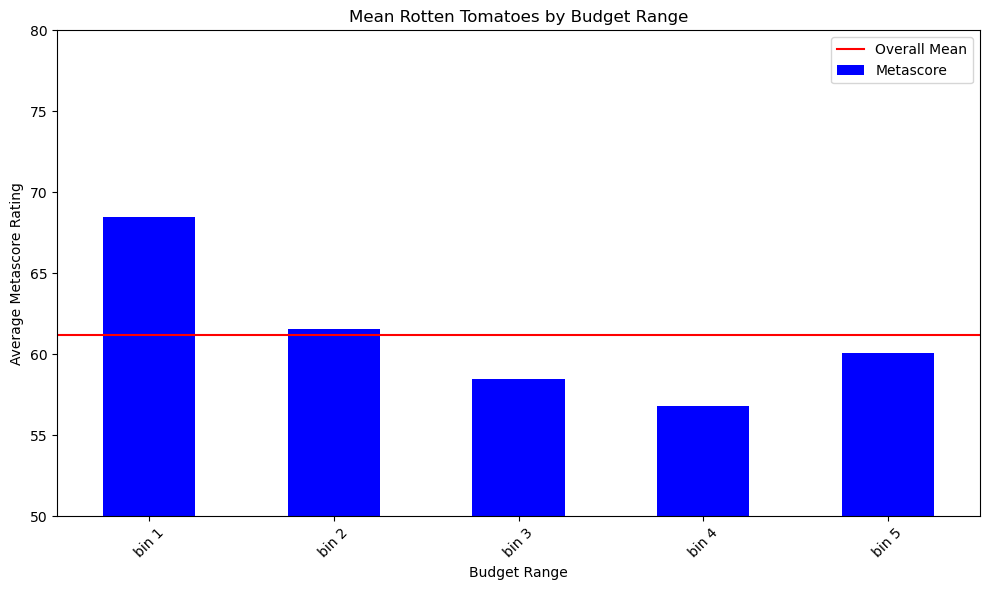

In [21]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()

overall_meta_mean = round(budget_analysis_df["Metascore"].mean(), 2)

plt.figure(figsize=(10, 6))
mean_by_meta.plot(kind='bar', color='blue')
plt.axhline(y=overall_meta_mean, color='red', linestyle='-', label='Overall Mean')
plt.xlabel("Budget Range")
plt.ylabel("Average Metascore Rating")
plt.ylim(50, 80)
plt.title("Mean Rotten Tomatoes by Budget Range")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3716273887.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()


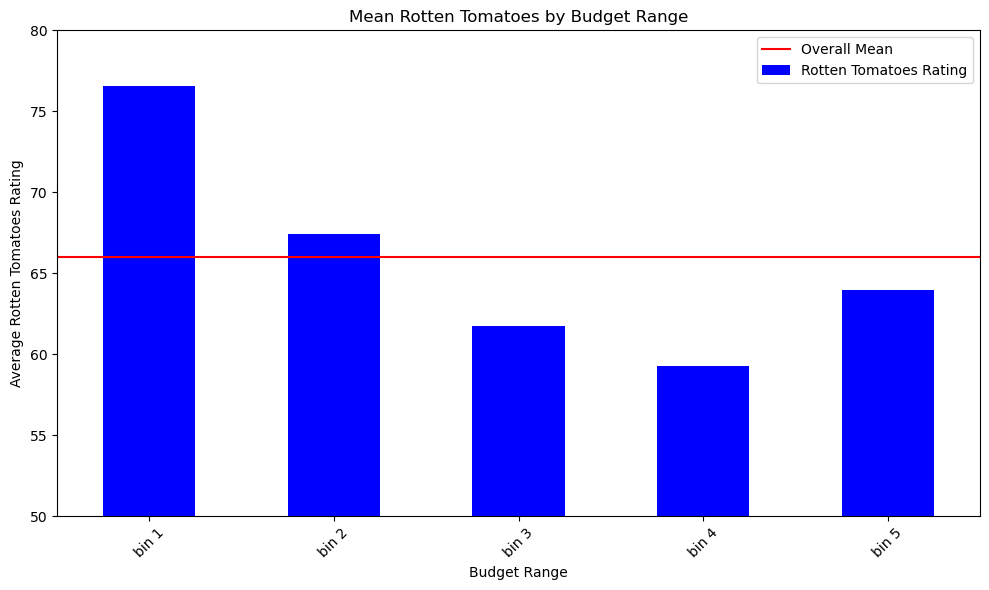

In [22]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()

overall_RT_mean = round(budget_analysis_df["Rotten Tomatoes Rating"].mean(), 2)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_RT.plot(kind='bar', color='blue')
plt.axhline(y=overall_RT_mean, color='red', linestyle='-', label='Overall Mean')
plt.xlabel("Budget Range")
plt.ylabel("Average Rotten Tomatoes Rating")
plt.ylim(50, 80)
plt.title("Mean Rotten Tomatoes by Budget Range")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\2358026074.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\2358026074.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()


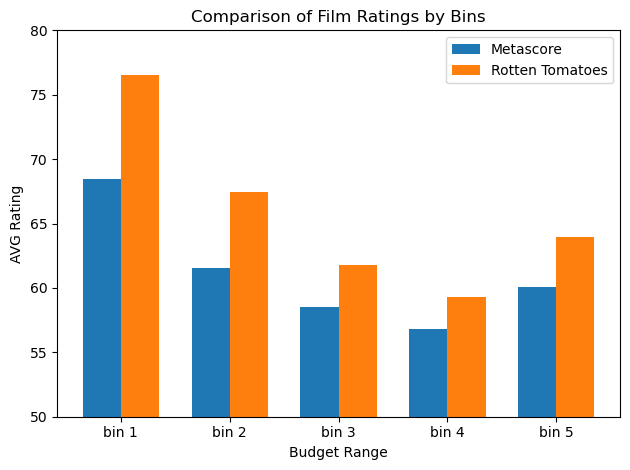

In [23]:
import matplotlib.pyplot as plt
import numpy as np

bins = sorted(budget_analysis_df["budget_bins"].unique())
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()

bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(bins))

# Plot the bars for the first rating
plt.bar(x - bar_width/2, mean_by_meta, bar_width, label='Metascore')

# Plot the bars for the second rating
plt.bar(x + bar_width/2, mean_by_RT, bar_width, label='Rotten Tomatoes')

# Add labels, title, legend, etc.
plt.xlabel('Budget Range')
plt.ylabel('AVG Rating')
plt.ylim(50, 80)
plt.title('Comparison of Film Ratings by Bins')
plt.xticks(x, bins)  # Assuming bins are the labels for x-axis
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\2040452305.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


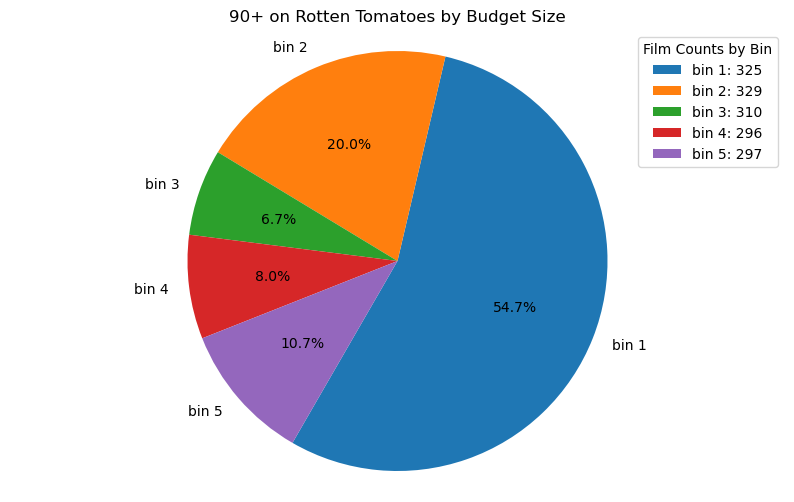

In [24]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_a_by_bin.index  # Budget bins as labels
sizes = count_a_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('90+ on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()



C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\1989291213.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


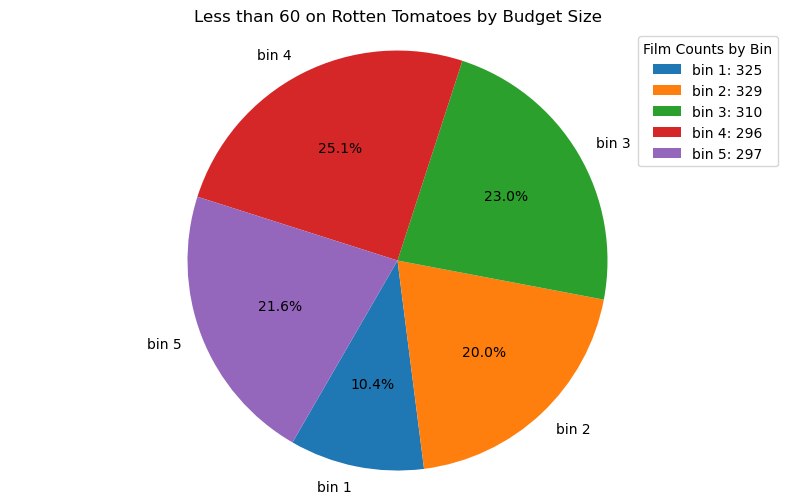

In [25]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_f_by_bin.index  # Budget bins as labels
sizes = count_f_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Less than 60 on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

In [26]:
budget_bin_count = budget_analysis_df.groupby("budget_bins").size()
budget_bin_count

C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\2598708380.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


budget_bins
bin 1    325
bin 2    329
bin 3    310
bin 4    296
bin 5    297
dtype: int64

In [27]:
from scipy import stats

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()
chi_bins_df = pd.DataFrame(budget_bin_count)
chi_bins_df[1] = 311.4
chi_bins_df.columns = ["actual", "even_dist"]
chi_bins_df.head()

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(critical_value)
stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])


9.487729036781154


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3646556451.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


Power_divergenceResult(statistic=3.0224791265253694, pvalue=0.5540706451090277)

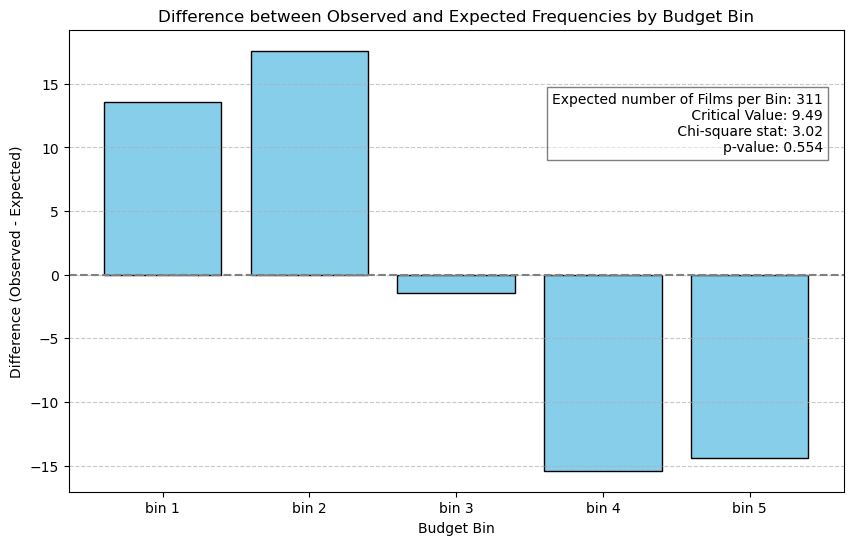

In [28]:
import matplotlib.pyplot as plt

# Assuming chi_bins_df contains the observed and expected frequencies
# Calculate the difference between observed and expected frequencies
chi_bins_df['difference'] = chi_bins_df['actual'] - chi_bins_df['even_dist']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(chi_bins_df.index, chi_bins_df['difference'], color='skyblue', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Difference between Observed and Expected Frequencies by Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Difference (Observed - Expected)')
plt.xticks(chi_bins_df.index)  # Set x-ticks as budget bin indices
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with chi-square statistic and p-value in the top-right corner
chi2_stat, p_val = stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])
plt.annotate(f'Expected number of Films per Bin: 311\n Critical Value: {critical_value:.2f}\n Chi-square stat: {chi2_stat:.2f}\np-value: {p_val:.3f}',
             xy=(1, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='top', xytext=(-15, -45), textcoords='offset points',
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()




In [29]:
budget_analysis_df = budget_analysis_df.assign(weighted_profit=lambda x: (x['profit'] / x['budget']).round(2))
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin,weighted_profit
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C,4.16
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C,3.25
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B,4.43
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B,11.34
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D,5.90


In [30]:
prof_mean_bybin = budget_analysis_df.groupby("budget_bins")["weighted_profit"].mean()
prof_mean_bybin

C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3841688139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prof_mean_bybin = budget_analysis_df.groupby("budget_bins")["weighted_profit"].mean()


budget_bins
bin 1    29.539354
bin 2     4.164529
bin 3     2.789032
bin 4     2.489392
bin 5     2.370236
Name: weighted_profit, dtype: float64

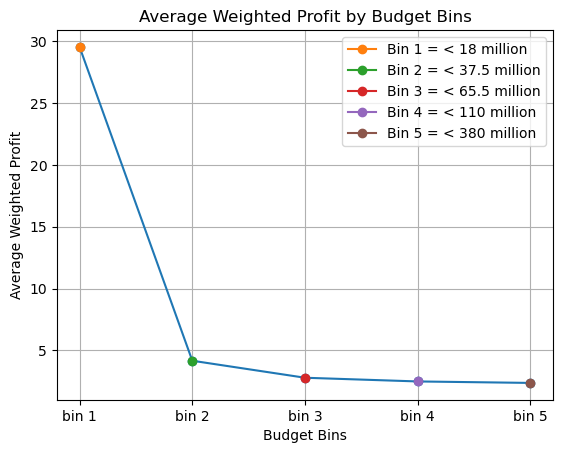

In [31]:
import matplotlib.pyplot as plt

# Sample data
budget_bins_labels = ["< 18 million", "< 37.5 million", "< 65.5 million", "< 110 million", "< 380 million"]

# Plotting
plt.plot(prof_mean_bybin.index, prof_mean_bybin.values, marker='o', linestyle='-')
plt.title('Average Weighted Profit by Budget Bins')
plt.xlabel('Budget Bins')
plt.ylabel('Average Weighted Profit')

# Loop through the bins and plot with labels
for i, bin_label in enumerate(budget_bins_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], marker='o', linestyle='-', label=f'Bin {i+1} = {bin_label}')

plt.legend()
plt.grid(True)
plt.show()


In [32]:
from scipy.stats import f_oneway

# Assuming budget_bins is a categorical variable and profit is the continuous variable
groups = []
for group_name, group_data in budget_analysis_df.groupby("budget_bins")["weighted_profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3.9031013487915867
p-value: 0.0036956016099970903


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\761790019.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_df.groupby("budget_bins")["weighted_profit"]:


In [33]:
groups = []
total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)
total_profit_mean_bybin

C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3305109238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)


budget_bins
bin 1     74016328
bin 2    107778018
bin 3    138594818
bin 4    213229836
bin 5    398031779
Name: profit, dtype: int32

C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3611163380.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)


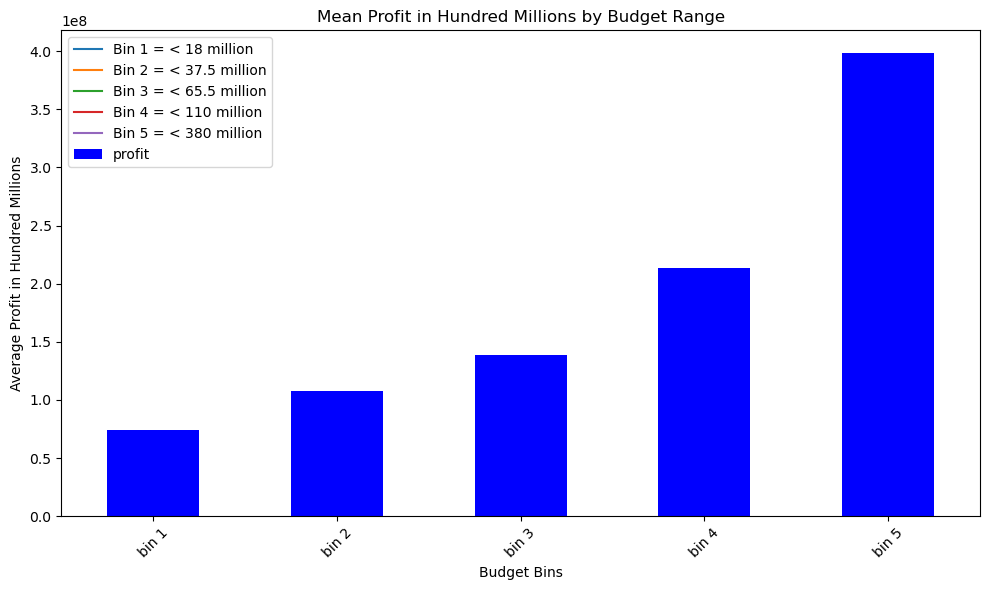

In [34]:
import matplotlib.pyplot as plt

# Sample data
total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)
budget_bin_labels = ["< 18 million", "< 37.5 million", "< 65.5 million", "< 110 million", "< 380 million"]

# Plotting
plt.figure(figsize=(10, 6))
bars = total_profit_mean_bybin.plot(kind='bar', color='blue')
plt.xlabel("Budget Bins")
plt.ylabel("Average Profit in Hundred Millions")
plt.title("Mean Profit in Hundred Millions by Budget Range")
plt.xticks(rotation=45)

for i, bin_label in enumerate(budget_bin_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], label=f'Bin {i+1} = {bin_label}')

plt.legend()


plt.tight_layout()
plt.show()


In [35]:
from scipy.stats import f_oneway

# Assuming budget_bins is a categorical variable and profit is the continuous variable
groups = []
for group_name, group_data in budget_analysis_df.groupby("budget_bins")["profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 112.61157876978983
p-value: 2.318210749137667e-84


C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\4171638139.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_df.groupby("budget_bins")["profit"]:


In [36]:
mean_budget_bygenre = budget_analysis_df.groupby("main_genre_movie")["budget"].agg(["mean", "count"]).astype(int)
mean_budget_bygenre

,mean,count
main_genre_movie,,
Action,78751138,804
Adventure,74911594,69
Animation,103102028,162
Biography,39889830,59
Comedy,34502829,171
Crime,35668506,77
Drama,32168329,169
Fantasy,64333333,3
Horror,16741165,36


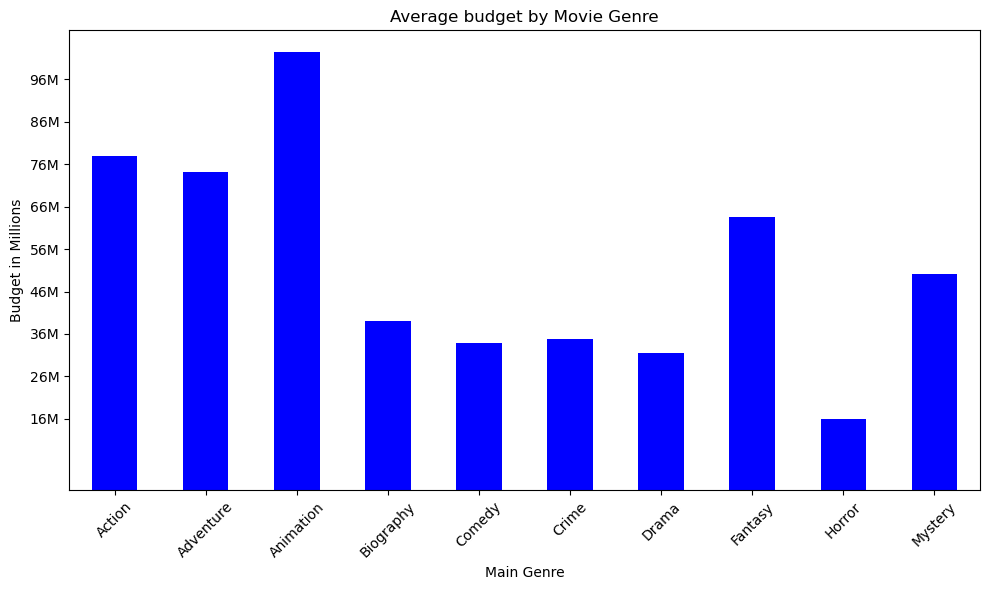

In [37]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_budget_bygenre = budget_analysis_df.groupby("main_genre_movie")["budget"].mean().astype(int)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_budget_bygenre.plot(kind='bar', color='blue')
plt.xlabel("Main Genre")
plt.ylabel("Budget in Millions")
#plt.ylim(50, 70)
plt.title("Average budget by Movie Genre")

min_budget = mean_budget_bygenre.min()
max_budget = mean_budget_bygenre.max()
plt.yticks(range(min_budget, max_budget+1, 10**7), [f'{x//10**6}M' for x in range(min_budget, max_budget+1, 10**7)])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
budget_analysis_df.columns

Index(['title', 'revenue', 'budget', 'genres', 'release_date',
       'Rotten Tomatoes Rating', 'Metascore', 'profit', 'Director', 'Actors',
       'main_genre_movie', 'side_genre_movie', 'budget_bins', 'RT_bin',
       'Meta_bin', 'weighted_profit'],
      dtype='object')

In [39]:
prof_by_genre = budget_analysis_df.groupby("main_genre_movie")["weighted_profit"].agg(["mean", "count"])
prof_by_genre

,mean,count
main_genre_movie,,
Action,3.529291,804
Adventure,3.888406,69
Animation,6.392099,162
Biography,4.341864,59
Comedy,6.357427,171
Crime,8.670130,77
Drama,8.085740,169
Fantasy,2.456667,3
Horror,158.231389,36


In [40]:
budget_analysis_df.columns

Index(['title', 'revenue', 'budget', 'genres', 'release_date',
       'Rotten Tomatoes Rating', 'Metascore', 'profit', 'Director', 'Actors',
       'main_genre_movie', 'side_genre_movie', 'budget_bins', 'RT_bin',
       'Meta_bin', 'weighted_profit'],
      dtype='object')

In [41]:
budget_analysis_df["main_genre_movie"].unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Mystery', 'Biography',
       'Animation', 'Comedy', 'Horror', 'Fantasy'], dtype=object)

In [42]:
def genre_stats(genre):
    genre_profit = budget_analysis_df.loc[budget_analysis_df["main_genre_movie"] == genre, :]
    genre_profit_budget = round(genre_profit["budget"].mean(),2)
    genre_profit_revenue = round(genre_profit["revenue"].mean(), 2)
    genre_profit_weighted = round(genre_profit_revenue/genre_profit_budget, 2)
    
    return genre_profit_budget, genre_profit_revenue, genre_profit_weighted

print(genre_stats("Crime"))


(35668506.49, 159331645.14, 4.47)


c:\Users\stoyt\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


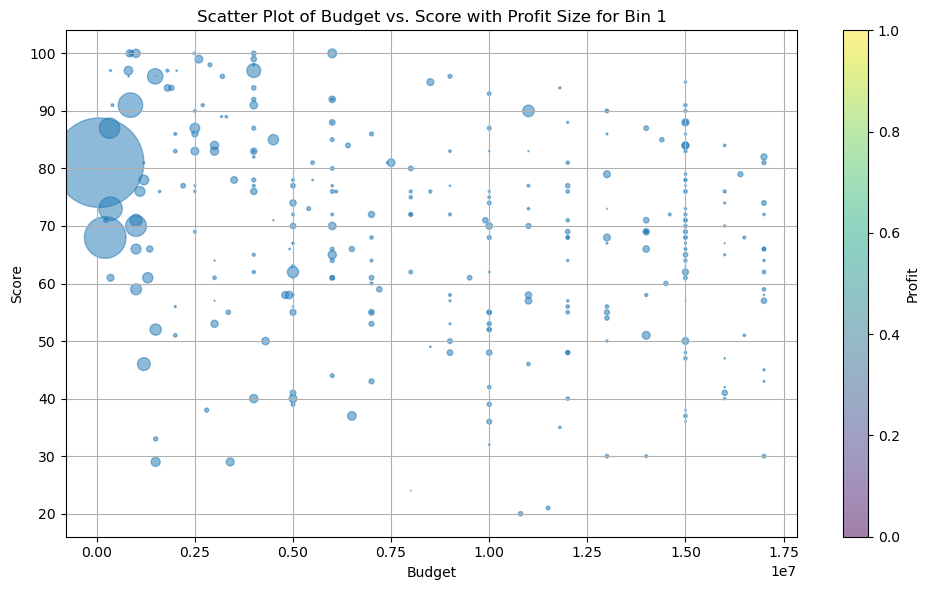

In [43]:
bin_1_data = budget_analysis_df[budget_analysis_df["budget_bins"] == "bin 1"]

budget_bin_1 = bin_1_data["budget"]
score_bin_1 = bin_1_data["Metascore"]
profit_bin_1 = bin_1_data["weighted_profit"]

plt.figure(figsize=(10, 6))
plt.scatter(budget_bin_1, score_bin_1, s=profit_bin_1, alpha=0.5)

# Add labels and title
plt.xlabel("Budget")
plt.ylabel("Score")
plt.title("Scatter Plot of Budget vs. Score with Profit Size for Bin 1")

# Add a color bar for profit size
plt.colorbar(label='Profit')

plt.grid(True)
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Metascore')

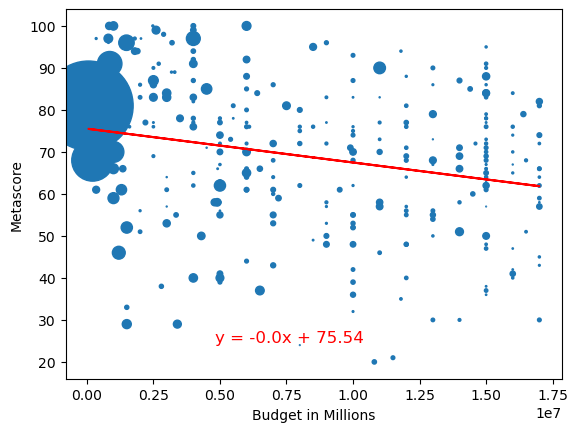

In [44]:
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = budget_bin_1
y_values = score_bin_1
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=profit_bin_1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.3, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore')

#plt.show()

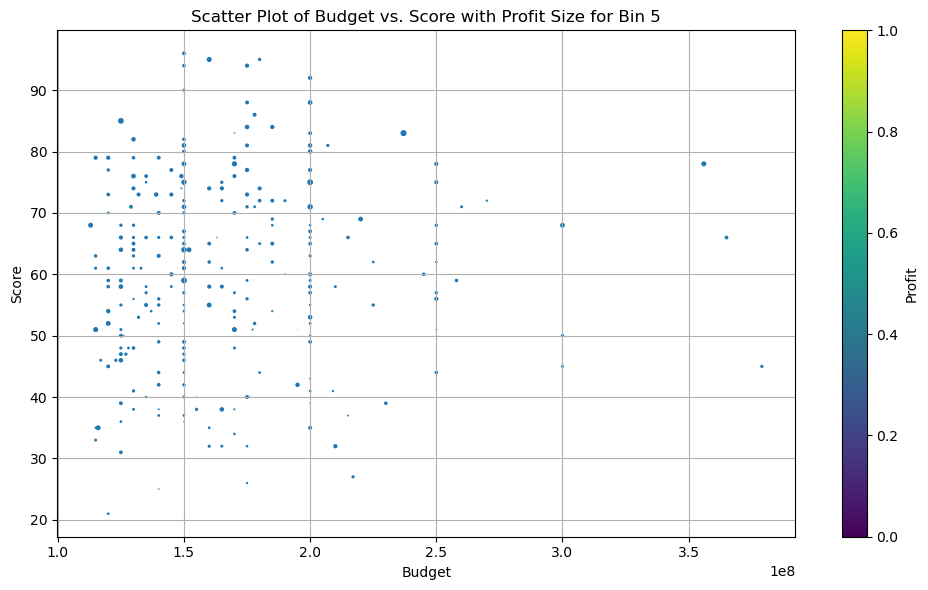

In [45]:
bin_5_data = budget_analysis_df[budget_analysis_df["budget_bins"] == "bin 5"]

budget_bin_5 = bin_5_data["budget"]
score_bin_5 = bin_5_data["Metascore"]
profit_bin_5 = bin_5_data["weighted_profit"]

plt.figure(figsize=(10, 6))
plt.scatter(budget_bin_5, score_bin_5, s=profit_bin_5, alpha= 0.9999999)

# Add labels and title
plt.xlabel("Budget")
plt.ylabel("Score")
plt.title("Scatter Plot of Budget vs. Score with Profit Size for Bin 5")

# Add a color bar for profit size
plt.colorbar(label='Profit')

plt.grid(True)
plt.tight_layout()
plt.show()

Slope: 0.0000000261


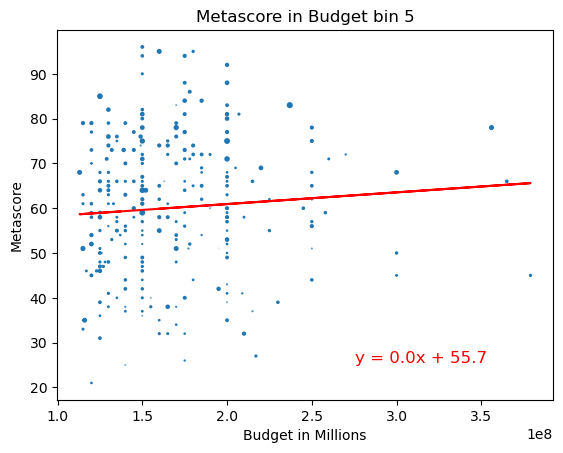

In [46]:
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = budget_bin_5
y_values = score_bin_5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=profit_bin_5, alpha=0.99999999)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.title("Metascore in Budget bin 5")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore')
print(f"Slope: {slope:.10f}")

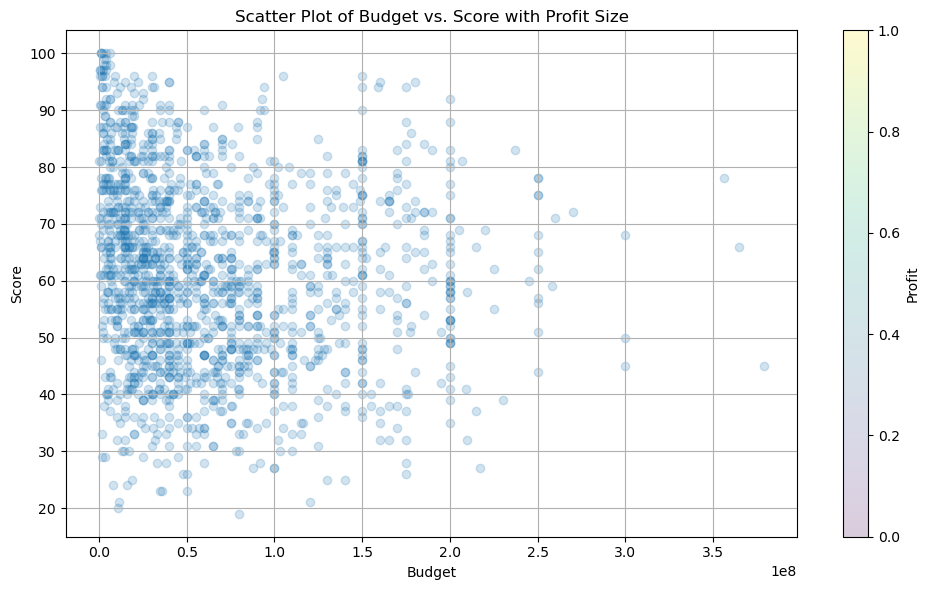

In [47]:
budget_data = budget_analysis_df["budget"]
score_data = budget_analysis_df["Metascore"]
profit_data = budget_analysis_df["weighted_profit"]

plt.figure(figsize=(10, 6))
plt.scatter(budget_data, score_data, alpha= 0.2)

# Add labels and title
plt.xlabel("Budget")
plt.ylabel("Score")
plt.title("Scatter Plot of Budget vs. Score with Profit Size")

# Add a color bar for profit size
plt.colorbar(label='Profit')

plt.grid(True)
plt.tight_layout()
plt.show()

Slope: -0.0000000336


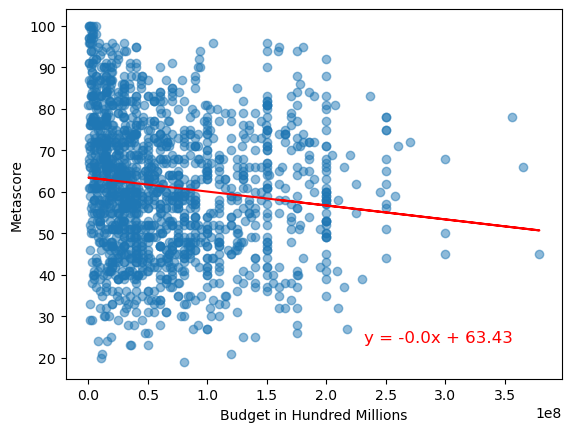

In [48]:
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = budget_data
y_values = score_data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Hundred Millions')
plt.ylabel('Metascore')
print(f"Slope: {slope:.10f}")

C:\Users\stoyt\AppData\Local\Temp\ipykernel_21940\3307563674.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = budget_analysis_df.groupby("budget_bins")["weighted_profit"].apply(list)


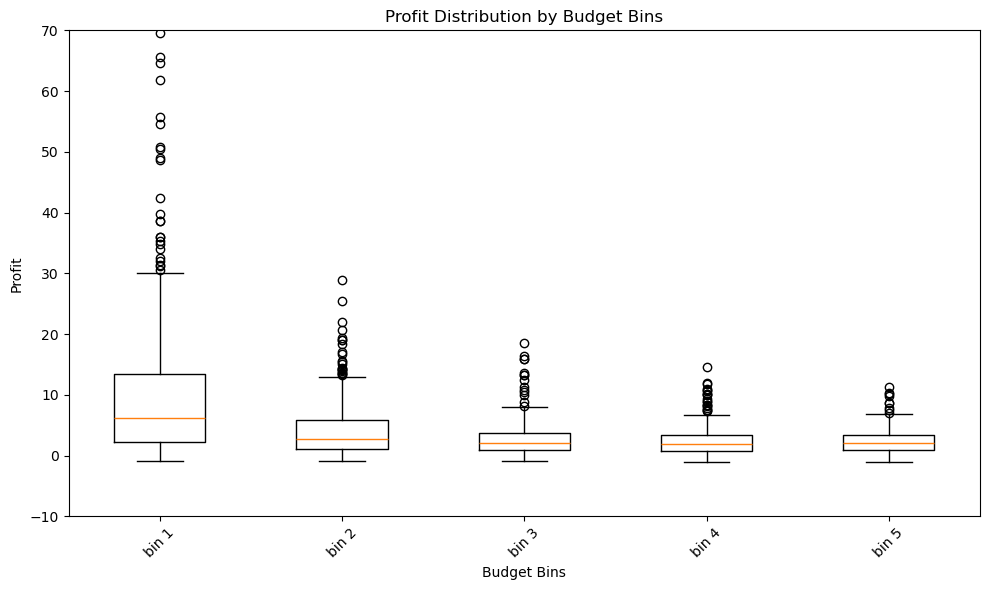

In [49]:
import matplotlib.pyplot as plt

data = budget_analysis_df.groupby("budget_bins")["weighted_profit"].apply(list)

# Plotting the box plots
plt.figure(figsize=(10, 6))

# Create box plots
plt.boxplot(data.values)

# Set labels and title
plt.xlabel("Budget Bins")
plt.ylabel("Profit")
plt.ylim(-10, 70)
plt.title("Profit Distribution by Budget Bins")
plt.xticks(range(1, len(data) + 1), data.index)  # Set x-ticks as bin labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
for i, (bin_label, bin_data) in enumerate(data.items()):
    quartiles = pd.Series(bin_data).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"Bin {bin_label}:")
    print(f"The lower quartile of data is: {lowerq}")
    print(f"The upper quartile of data is: {upperq}")
    print(f"The interquartile range of data is: {iqr}")
    print(f"The the median of data is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

plt.tight_layout()
plt.show()

Bin bin 1:
The lower quartile of data is: 2.27
The upper quartile of data is: 13.38
The interquartile range of data is: 11.110000000000001
The the median of data is: 6.15
Values below -14.395000000000003 could be outliers.
Values above 30.045 could be outliers.
Bin bin 2:
The lower quartile of data is: 1.04
The upper quartile of data is: 5.82
The interquartile range of data is: 4.78
The the median of data is: 2.69
Values below -6.13 could be outliers.
Values above 12.99 could be outliers.
Bin bin 3:
The lower quartile of data is: 0.845
The upper quartile of data is: 3.71
The interquartile range of data is: 2.865
The the median of data is: 2.115
Values below -3.4525000000000006 could be outliers.
Values above 8.0075 could be outliers.
Bin bin 4:
The lower quartile of data is: 0.815
The upper quartile of data is: 3.3024999999999998
The interquartile range of data is: 2.4875
The the median of data is: 1.9249999999999998
Values below -2.91625 could be outliers.
Values above 7.0337499999999

<Figure size 640x480 with 0 Axes>

In [51]:
profit_loss = budget_analysis_df.loc[budget_analysis_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()
print(movie_counts_by_bin_loss)

budget_bins
bin 2    31
bin 1    26
bin 3    25
bin 4    24
bin 5    18
Name: count, dtype: int64


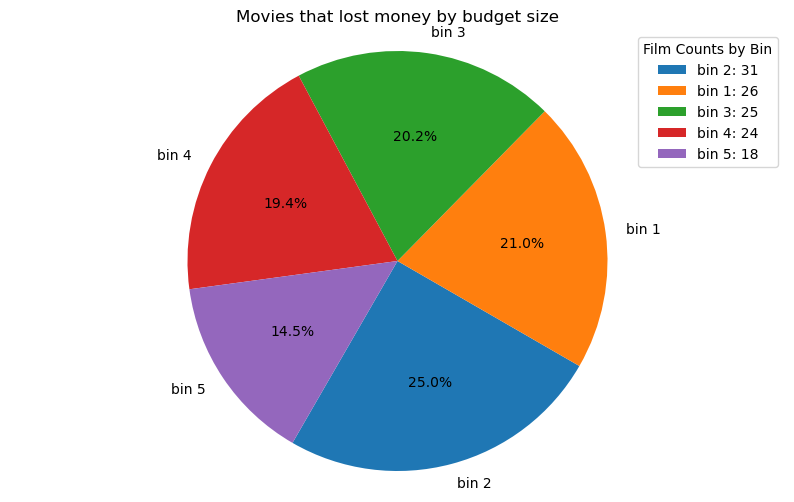

In [52]:
import matplotlib.pyplot as plt

labels = movie_counts_by_bin_loss.index  # Budget bins as labels
sizes = movie_counts_by_bin_loss.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Movies that lost money by budget size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, sizes)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

In [131]:
from scipy import stats

movie_loss_count = movie_counts_by_bin_loss.values
chi_bins_df = pd.DataFrame(movie_loss_count)
chi_bins_df[1] = 24.8
chi_bins_df.columns = ["actual", "even_dist"]
chi_bins_df.head()

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(f'critical value = {critical_value}')
stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])

critical value = 9.487729036781154


Power_divergenceResult(statistic=3.5, pvalue=0.477878344488724)